<a href="https://colab.research.google.com/github/RaphonGaluh/TopicModelling-LSA-/blob/main/Code/21110034_Raphon_Galuh_Candraningtyas_Topik_modelling_LSA_Health_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Raphon Galuh Candraningtyas** <br>
**NIM : 21110034**

1. Unduh Dataset health news berikut.<br>

2. Lakukan pembersihan data dan penggabungan data. <br>

3. Lakukan topic modeling analysis menggunakan LSA. Lakukan percobaan menggunakan 5-10 topic dan analisis topic yang paling sering dibicarakan dalam setiap topik. <br>

4. Unggal hasil pekerjaan Anda, file ipnb, pdf berupa hasil kode dan screen shoot hasil running program. <br>

In [ ]:
import pandas as pd
import re
import nltk.corpus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**LOAD DATA**

In [ ]:
data = pd.read_fwf("/content/goodhealth.txt", header=None)
data

,0,1,2,3,4,5
0,577117109701967872|Sun,Mar,15,14:40:15,0,2015|It’s not hard to get a little cardio in a...
1,577083140977651712|Sun,Mar,15,12:25:17,0,2015|Beauty really does come from within. Disc...
2,577040308669669376|Sun,Mar,15,09:35:05,0,2015|Busted! 15 myths and facts you really nee...
3,577011455389757440|Sun,Mar,15,07:40:25,0,2015|Get rid of a puffy tummy! See the 13 best...
4,576979914592804864|Sun,Mar,15,05:35:06,0,2015|Pillow talk: Find the perfect pillow for ...
...,...,...,...,...,...,...
7859,80629372100415488|Tue,un,4,3:35:14,0,011|Living With Pets May Protect Infants From ...
7860,80629263631527936|Tue,un,4,3:34:49,0,011|@SarahCampus We know the feeling! Here are...
7861,80390283203842048|Mon,un,3,1:45:11,0,011|The Simple Secret to Great Sleep | Here's ...
7862,80371370009174016|Mon,un,3,0:30:02,0,011|Hot days call for refreshing drinks. Whip ...


In [ ]:
data.drop([0,1,2,3,4], axis=1,inplace=True)

In [ ]:
data

,5
0,2015|It’s not hard to get a little cardio in a...
1,2015|Beauty really does come from within. Disc...
2,2015|Busted! 15 myths and facts you really nee...
3,2015|Get rid of a puffy tummy! See the 13 best...
4,2015|Pillow talk: Find the perfect pillow for ...
...,...
7859,011|Living With Pets May Protect Infants From ...
7860,011|@SarahCampus We know the feeling! Here are...
7861,011|The Simple Secret to Great Sleep | Here's ...
7862,011|Hot days call for refreshing drinks. Whip ...


**Membersihkan Data**

In [ ]:
stop_words = stopwords.words('english')
def clean(text):
  text = text.str.lower() #Normalisasi data text
  #Menghapus kombinasi unicode dan link yang terdapat pada data
  text =text.replace('r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/,\S+)|^rt|http.+?"', value = ' ', regex = True)
  text = text.str.replace(':','',regex=True)
  text = text.str.replace('rt','',regex=True)
  text = text.str.replace('\d+', '',regex=True)
  text = text.str.replace('pyzyb', '',regex=True)
  text = text.str.replace('pbs', '',regex=True)
  text = text.str.replace('wp', '',regex=True)
  text = text.str.replace('via', '',regex=True)
  text = text.str.replace('twimg', '',regex=True)
  text = text.str.replace('jpg', '',regex=True)
  text = text.str.replace('http', '',regex=True)
  text = text.str.replace('ly', '',regex=True)
  text = text.str.replace('ow', '',regex=True)
  text = text.str.replace('bit', '',regex=True)
  text = text.str.replace('get', '',regex=True)
  text = text.str.replace('com', '',regex=True)
  text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
  #text = text.apply(stemmer.stem(text))


  return text


In [ ]:
text=clean(data[5])
test = text.to_frame()
column = ['clean']
test.columns=column
test

,clean
0,hard little cardio home kristinmcgee awesome p...
1,beauty real e within discover wellness tips si...
2,busted myths facts real need kn cellulite kiiy
3,rid puffy tummy see best worst foods beat bloa...
4,pill talk find perfect pill p pose handy guide...
...,...
7859,living pets may protect infants allergies ivjz
7860,sarahcampus kn feeling fave l cal nibbles hold...
7861,simple secret great sleep h deal mon sleep ste...
7862,hot days call refreshing drinks whip fami figu...


**Vectorizing Preparations**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

vect_text=vect.fit_transform(test['clean'])

In [ ]:
print(vect_text.shape)
print(vect_text)

(7864, 1000)
  (0, 552)	0.33836662619739816
  (0, 56)	0.40713197018152497
  (0, 461)	0.3755503394310529
  (0, 414)	0.3390220553645054
  (0, 129)	0.4111716242542391
  (0, 486)	0.34381292179316136
  (0, 386)	0.42012872298585763
  (1, 884)	0.35656664599282756
  (1, 963)	0.4583935757794693
  (1, 222)	0.581515081839507
  (1, 680)	0.4115371572614874
  (1, 71)	0.3939707278921403
  (2, 459)	0.3131875100189071
  (2, 567)	0.3195101419997769
  (2, 286)	0.472273509123245
  (2, 563)	0.4429834848547021
  (2, 111)	0.5128335249228567
  (2, 680)	0.34285856146381605
  (3, 87)	0.4694709997008081
  (3, 70)	0.4211510345811668
  (3, 327)	0.2815892439948682
  (3, 983)	0.37128721594800806
  (3, 77)	0.3036215946089646
  (3, 723)	0.3151535592947147
  (3, 911)	0.43997073630196665
  :	:
  (7861, 545)	0.3546801132035158
  (7861, 721)	0.3797173734405423
  (7861, 208)	0.4109859145352694
  (7861, 366)	0.2859265683567447
  (7861, 749)	0.31440410603869623
  (7861, 757)	0.6168495499493447
  (7862, 120)	0.328436151861435

**Topic Modelling**

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)


In [ ]:
print(lsa_top)
print(lsa_top.shape)

[[ 0.05015199  0.0337679  -0.01924047 ... -0.04804079 -0.04618333
   0.03393743]
 [ 0.09793378  0.05899726 -0.08920589 ...  0.02035334  0.01168181
   0.01383199]
 [ 0.08014764  0.02920325 -0.05330205 ... -0.01402781  0.00022364
  -0.00469563]
 ...
 [ 0.0674387   0.00858929 -0.01342785 ... -0.00610263 -0.00317654
   0.00800937]
 [ 0.05750919  0.03318361  0.00684999 ... -0.00948512  0.013518
  -0.00446474]
 [ 0.07402373  0.02944633 -0.0660435  ...  0.05480087 -0.00418943
  -0.02558069]]
(7864, 10)


In [ ]:
print

<function print>

In [ ]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  5.015199056699924
Topic  1  :  3.3767899840102826
Topic  2  :  -1.9240465543163061
Topic  3  :  -2.243950975028735
Topic  4  :  0.8427440744990315
Topic  5  :  -4.198245099753919
Topic  6  :  2.2536193856965028
Topic  7  :  -4.8040794736379215
Topic  8  :  -4.6183328737336815
Topic  9  :  3.393742640161621


In [ ]:
print(lsa_model.components_.shape)
print(lsa_model.components_)

(10, 1000)
[[ 5.14010562e-03  5.25755346e-03  4.57832523e-03 ...  1.22943558e-02
   8.69906053e-03  7.90664632e-03]
 [ 4.81756524e-03  6.47271425e-05 -2.18416767e-04 ...  2.09211783e-02
   1.65169314e-02  2.08700994e-02]
 [-8.21547333e-03 -5.59518456e-03 -4.33460147e-03 ...  2.30916144e-02
   1.83684523e-02  2.56259539e-02]
 ...
 [ 2.50237477e-02  1.52005441e-03 -4.90645196e-04 ... -1.39330777e-03
   2.67919890e-03  1.32019581e-02]
 [-2.79195834e-02 -3.57987610e-03 -3.59158600e-03 ...  1.09604338e-02
  -5.44553077e-04 -2.65822675e-03]
 [ 5.26377754e-02 -4.74374367e-03 -2.88349323e-03 ... -2.64554899e-03
  -7.81274210e-04 -3.70350241e-03]]


In [ ]:
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
  print("Topic "+str(i)+": ")
  for t in sorted_words:
    print(t[0],end=" ")
  print("\n")

Topic 0: 
cynthiasass goodhealth healthy amp weight health ways make try day 

Topic 1: 
recipe try day recipes healthy ways pinterest pin easy media 

Topic 2: 
recipe day try goodhealth healthy cynthiasass recipes amp salad chicken 

Topic 3: 
pinterest pin goodhealth recipe day cynthiasass amp calories foods fat 

Topic 4: 
chance enter sweepstakes win week holiday prizes prize grand dai 

Topic 5: 
health healthtotalwellness weekend canyonranch healthy recipes like us new thanks 

Topic 6: 
media health recipe time pinterest day kn goodhealth pin things 

Topic 7: 
day weight recipe lose diet loss help media year ways 

Topic 8: 
healthy media make recipes thanks diet people help food happy 

Topic 9: 
thanks healthtotalwellness new weekend us canyonranch talknutrition year workout time 



**WordCloud**

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]
  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

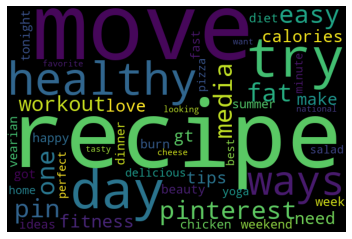

In [ ]:
draw_word_cloud(1)

In [ ]:
#MENAMPILKAN 10 TOPIK MODELING LSA
vocab = vect.get_feature_names()
for i, comp in enumerate(lsa_model.components_):
 vocab_comp = zip(vocab, comp)
 sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
 print("Topic "+str(i)+": ")
 for t in sorted_words:
    print(t[0],end=", ")
 print("\n")

Topic 0: 
cynthiasass, goodhealth, healthy, amp, weight, health, ways, make, try, day, 

Topic 1: 
recipe, try, day, recipes, healthy, ways, pinterest, pin, easy, media, 

Topic 2: 
recipe, day, try, goodhealth, healthy, cynthiasass, recipes, amp, salad, chicken, 

Topic 3: 
pinterest, pin, goodhealth, recipe, day, cynthiasass, amp, calories, foods, fat, 

Topic 4: 
chance, enter, sweepstakes, win, week, holiday, prizes, prize, grand, dai, 

Topic 5: 
health, healthtotalwellness, weekend, canyonranch, healthy, recipes, like, us, new, thanks, 

Topic 6: 
media, health, recipe, time, pinterest, day, kn, goodhealth, pin, things, 

Topic 7: 
day, weight, recipe, lose, diet, loss, help, media, year, ways, 

Topic 8: 
healthy, media, make, recipes, thanks, diet, people, help, food, happy, 

Topic 9: 
thanks, healthtotalwellness, new, weekend, us, canyonranch, talknutrition, year, workout, time, 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Didapat 10 Topik utama:

1. cynthiasass

2. recipe

3. recipe

4. pinterest

5. chance

6. health

7. media

8. day

9. healthy

10. thanks